In [1]:
import numpy as np 
from Option import Option
from sklearn.linear_model import LinearRegression
from Dynamic_programming import Dynamic_pricing
from Monte_carlo import MonteCarlo_simulator

In [2]:
import numpy as np
from scipy.optimize import minimize
from sklearn.preprocessing import StandardScaler
# def least_square_minimizer(payoff_simulation, Tau_i_1, Price_simulation_i, Projection_base,n,m): #tau_i_1 = tau_i+1
#     Y = np.array([payoff_simulation[int(Tau_i_1[path] ), path] for path in range(n)])
#     X = np.array([Projection_base(m, Price_simulation_i[path]) for path in range(n)])
#     # Création des scalers pour X et Y
#     scaler_X = StandardScaler()
#     scaler_Y = StandardScaler()

#     # Ajustement des scalers sur les données
#     scaled_X = scaler_X.fit_transform(X)
#     scaled_Y = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()
#     model = LinearRegression()
#     model.fit(scaled_X, scaled_Y)
#     alpha = model.coef_
#     #residuals = scaler_Y - model.predict(scaled_X)
#     #print("Résidus (Erreurs) : ", residuals)
#     return alpha
def least_square_minimizer(payoff_simulation, Tau_i_1, Price_simulation_i, Projection_base,n,m):  #hala
    Y = np.zeros(len(Tau_i_1))
    
    # Fill the array Y by selecting elements from Z based on indices
    for k in range(n):
        Y[k]=payoff_simulation[int(Tau_i_1[k]-1),k]
    X = np.array([Projection_base(m, Price_simulation_i[path]) for path in range(n)])
    model = LinearRegression()
    model.fit(X, Y)
    alpha = model.coef_
    return alpha


# def least_square_minimizer(payoff_simulation, Tau_i_1, Price_simulation_i, Projection_base, n, m):
#     Y = np.array([payoff_simulation[int(Tau_i_1[path] - 1), path] for path in range(n)])
#     X = np.array([Projection_base(m, Price_simulation_i[path]) for path in range(n)])
#     # Création des scalers pour X et Y
#     scaler_X = StandardScaler()
#     scaler_Y = StandardScaler()

#     # Ajustement des scalers sur les données
#     scaled_X = scaler_X.fit_transform(X)
#     scaled_Y = scaler_Y.fit_transform(Y.reshape(-1, 1)).flatten()

#     # Fonction à minimiser
#     def objective_function(beta):
#         return np.sum((Y - np.dot(X, beta)) ** 2)

#     # Initialisation des coefficients
#     initial_guess = [0]*X.shape[1]

#     # Minimisation de la fonction objective
#     result = minimize(objective_function, initial_guess)

#     # Coefficients de régression
#     a = result.x
#     print("a=",a)
#     # Calcul des résidus
#     residuals = Y - np.dot(X, a)
#     print("Résidus (Erreurs) : ", residuals)

#     return a

# def least_square_minimizer( payoff_simulation, Tau_i_1, Price_simulation_i, Projection_base,n,m):
#     Y = np.array([payoff_simulation[int(Tau_i_1[path] - 1), path] for path in range(n)])
#     X = np.array([Projection_base(m, Price_simulation_i[path]) for path in range(n)])

#     # Calcul des coefficients a par la méthode des moindres carrés
#     a, residu, rank, s = np.linalg.lstsq(X, Y, rcond= None)
#     print(residu)
#   # Les coefficients a
#     return a
def dynamic_prog_price(payoff_0,n,m,L,price_simulation,payoff_simulation,Projection_base):

    # payoff_0 = payoff_function(S0)
    # price_simulation=price_simu
    # payoff_simulation = payoff_simu

    Tau = np.zeros((L, n))
    Tau[L - 1, :] = L * np.ones(n)
    for i in range(L - 2, -1, -1):
        alpha_i = least_square_minimizer(payoff_simulation, Tau[i + 1, :], price_simulation[i, :], Projection_base,n,m)
        for path in range(n):
            approx_ = alpha_i.T @ Projection_base(m,price_simulation[i, path])
            if payoff_simulation[i, path] >= approx_:
                Tau[i, path] = i
            else:
                Tau[i, path] = Tau[i + 1, path]
    monte_carlo_approx = sum([payoff_simulation[int(Tau[0, i]),i] for i in range(n)]) / n
    U_0 = max(payoff_0, monte_carlo_approx)

    return U_0


# def dynamic_prog_price(payoff_0,n,m,L,price_simulation,payoff_simulation,Projection_base):  
    
#     Tau = np.zeros((L , n))
#     Tau[L - 1, :] = L * np.ones(n)
#     # Tau = np.zeros((L - 1, n))
#     # Tau[L - 2, :] = L * np.ones(n)
#     for i in range(L - 2, -1, -1):
#         alpha_i = least_square_minimizer(payoff_simulation, Tau[i + 1, :], price_simulation[i, :],Projection_base,n,m)
        
#         for path in range(n):
#             approx_ = alpha_i.T @ Projection_base(m,price_simulation[i, path])
#             if payoff_simulation[i, path] >= approx_:
#                 Tau[i, path] = i
#             else:
#                 Tau[i, path] = Tau[i + 1, path]

#     monte_carlo_approx = sum([payoff_simulation[int(Tau[0, i])- 1,0] for i in range(n)]) / n
    # U_0 = max(payoff_0, monte_carlo_approx)

    # return U_0


In [3]:
list(range(4, -1, -1))

[4, 3, 2, 1, 0]

# Simulations

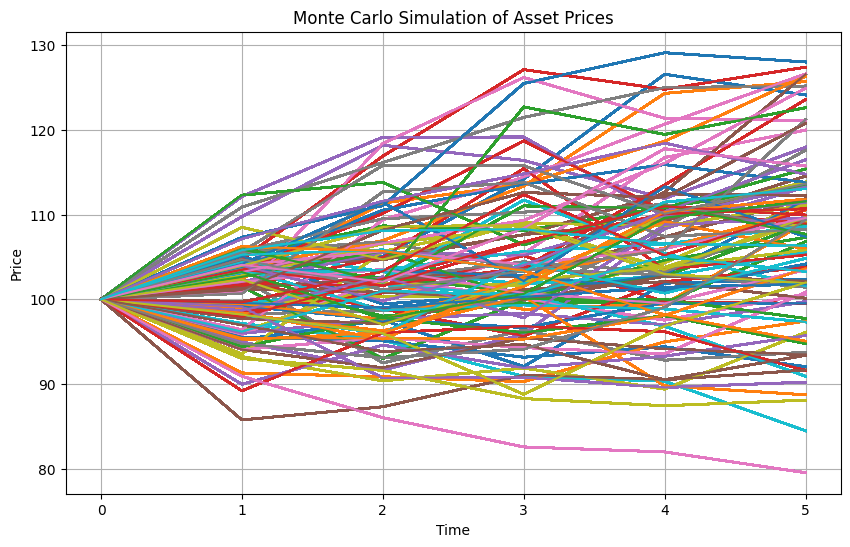

In [5]:
# def payoff_function(S):
#     return np.maximum(S - 100, 0)  # Example call option payoff function
def Laguerre_base(m, x):
    laguerre_polynomials = np.zeros(m+1)
    for i in range(m+1):
        laguerre_polynomials[i] = np.exp(-x / 2) * x**i * np.sqrt(np.math.factorial(i) / np.math.factorial(i + 1))
    return laguerre_polynomials
def Projection_base(m, x):
    return x ** np.arange(0,m)  # Polynomial projection base
def Projection_base_GBM(a,b, x):
    return x ** np.arange(1, m + 1)  # Polynomial projection base

# Create instance of DynamicPricing
r = 0.05
sigma = 0.1
S0 = 100
L = 5 #60
n =100 #100
m = 50 # Degree of polynomial
a= 0.75
b=1.75
q=0.5

k=95
# Create Option object
call = Option(s0=S0, T=L, K=k, call=True)
payoff_0 = call.payoff(S0)

# Create instance of MonteCarlo_simulator
Simulation = MonteCarlo_simulator(S0, L, n,r=r,sigma=sigma,model_type="GBM")

# Visualize price simulation
Simulation.visualisation_price()

# Simulate payoff
price_simulation = Simulation.monte_carlo_price_simulator()
payoff_simulation = Simulation.monte_carlo_payoff_simulator(call.payoff,price_simulation)


# Pricing

In [6]:

import numpy as np
from scipy.stats import norm

def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Définition des paramètres
S = S0  # Prix actuel de l'actif sous-jacent
K = k  # Prix d'exercice de l'option
T = L/365 #/ 365  # Temps jusqu'à l'expiration de l'option (en années)
r=r  # Taux d'intérêt sans risque
sigma = sigma  # Volatilité de l'actif sous-jacent

# Calcul du prix de l'option européenne d'achat (call) en utilisant le modèle Black-Scholes
call_price = black_scholes_call(S, K, T, r, sigma)

print("Le prix de l'option européenne d'achat (call) est :", call_price)



Le prix de l'option européenne d'achat (call) est : 5.065047269372897


In [ ]:

#dynamic_prog_price(payoff_0,n,m,L,price_simulation,payoff_simulation,Laguerre_base)

In [7]:

for i in range(5):
    dynamic=Dynamic_pricing(S0, L, n,m,Laguerre_base,call.payoff,r=r,sigma=sigma,model_type="GBM")
    u,Tau=dynamic.dynamic_prog_price()
    print("Dynamic Pricing:", u)
    Tau


Dynamic Pricing: 7.05213383170526
Dynamic Pricing: 5.985632702078728
Dynamic Pricing: 6.110589128399668
Dynamic Pricing: 6.423691163549998
Dynamic Pricing: 6.094939203959448


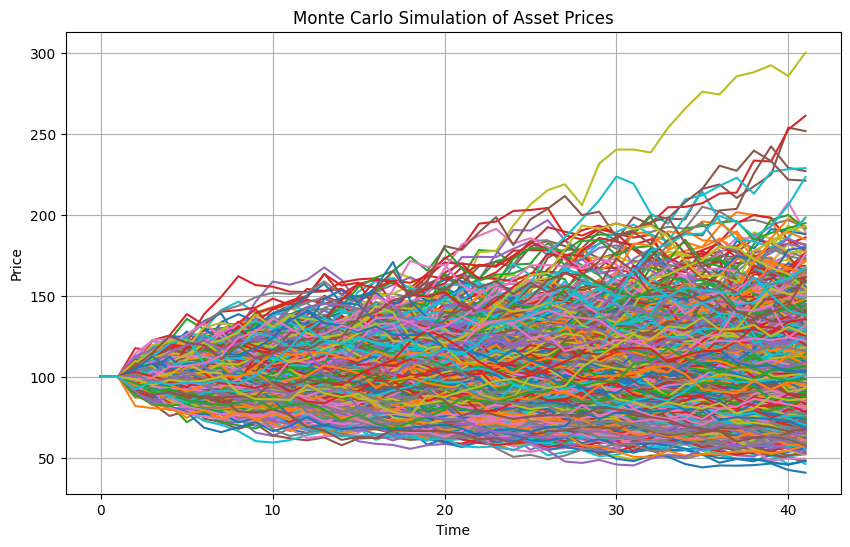

In [ ]:


#Visualize asset price simulation
Price_simulation = dynamic.monte_carlo_price_simulator()
dynamic.visualisation_price()